Finance years: [2019, 2023]
Merged (finance + wins) years: [2019, 2023]
   Year      Team  Total Spending Currency  Wins      Era
0  2019  Mercedes       425000000      USD  15.0  Pre-Cap
1  2019   Ferrari       435000000      USD   3.0  Pre-Cap
2  2019  Red Bull       335000000      USD   3.0  Pre-Cap
3  2019   McLaren       250000000      USD   0.0  Pre-Cap
4  2019   Renault       210000000      USD   0.0  Pre-Cap


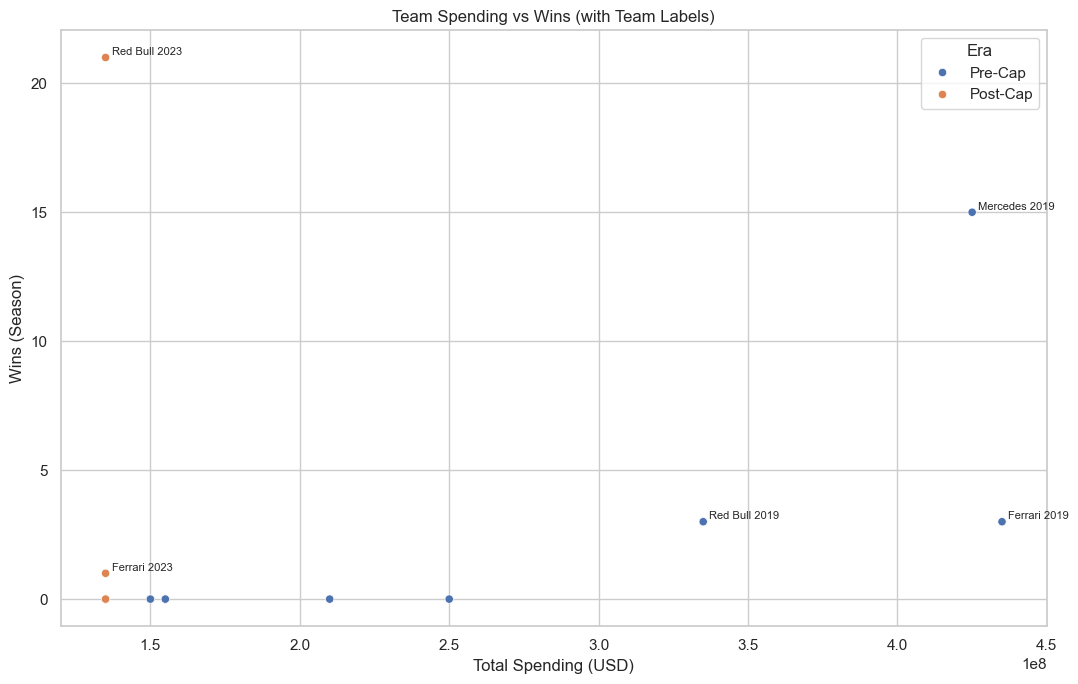

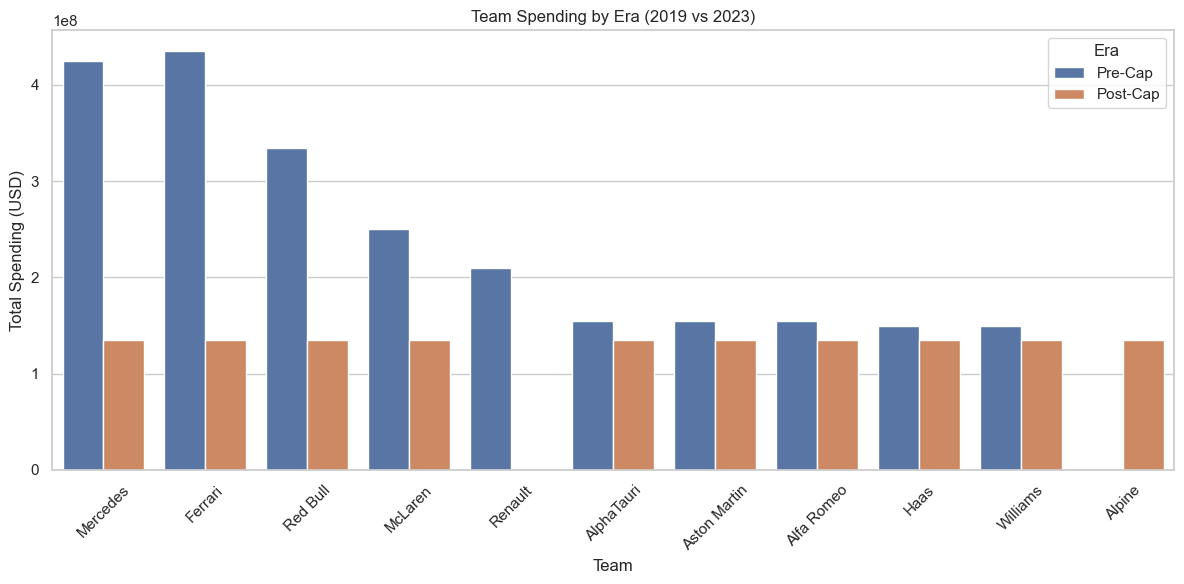


Finance+Wins correlations (2019 vs 2023):
All eras:
                 Total Spending      Wins
Total Spending        1.000000  0.346245
Wins                  0.346245  1.000000 

Pre-Cap:
                 Total Spending      Wins
Total Spending        1.000000  0.737152
Wins                  0.737152  1.000000 

Post-Cap:
                 Total Spending  Wins
Total Spending             NaN   NaN
Wins                       NaN   1.0 



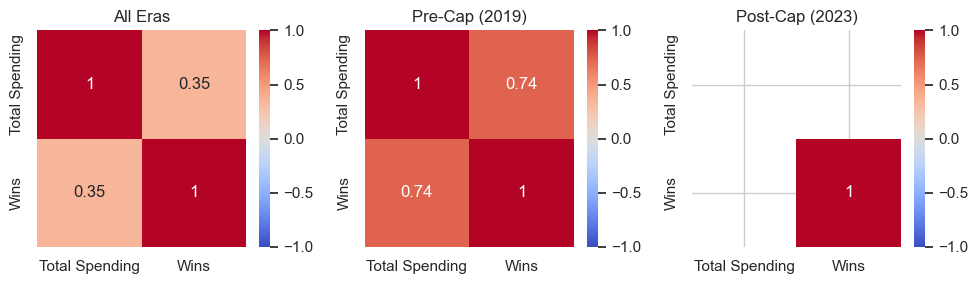


--- Correlation test: Budget vs Wins (2019 vs 2023) ---
Pre-Cap -> r = 0.737, p = 0.0150
Post-Cap correlation cannot be computed (spending is constant).

--- t-test: Wins (2019 vs 2023) ---
T-test Wins: t = -0.039, p = 0.9694


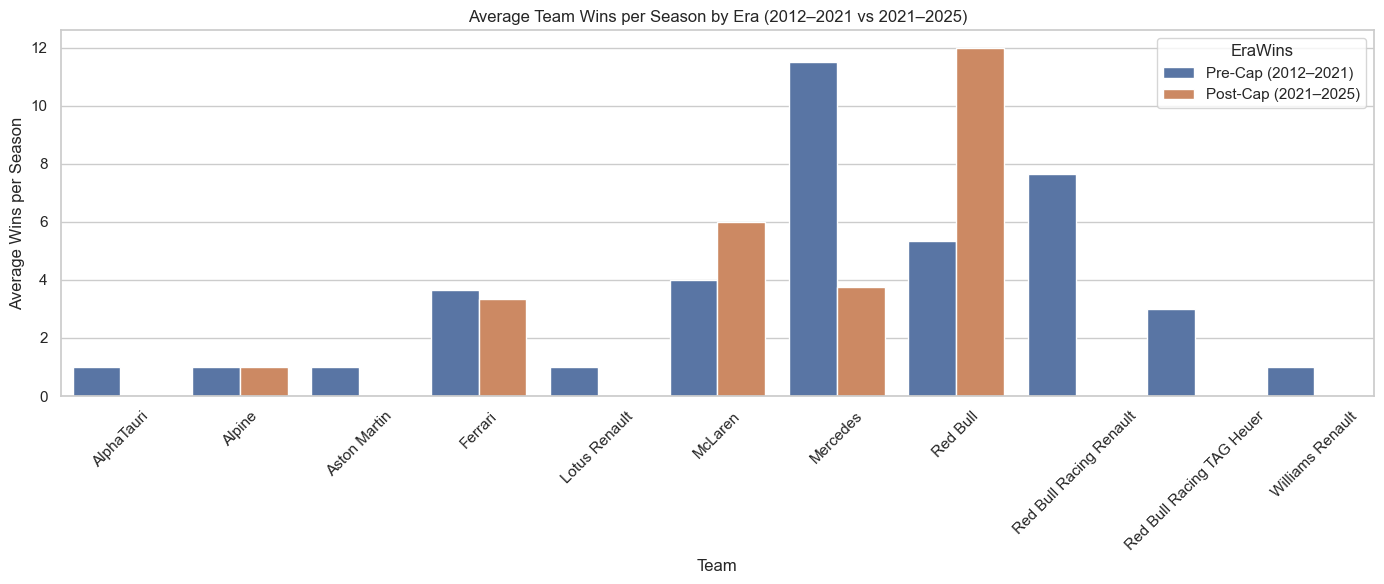

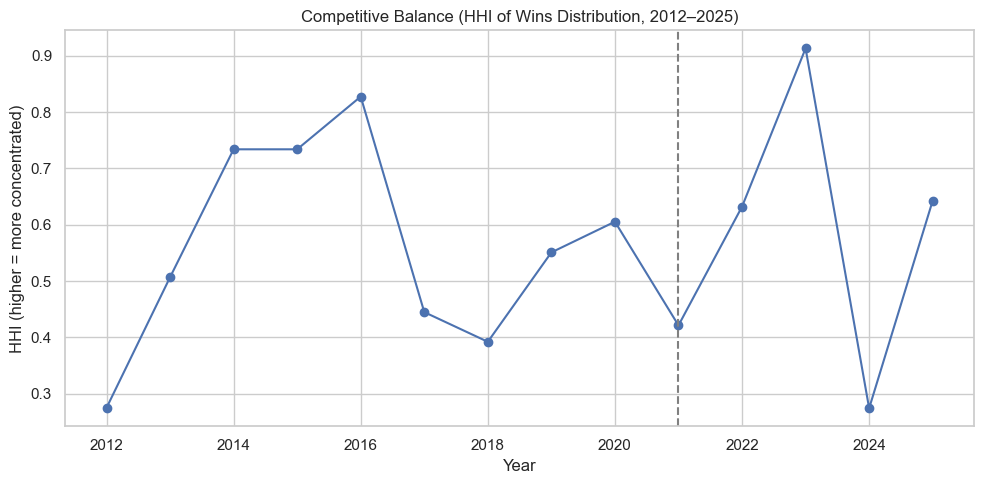

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind

sns.set(style="whitegrid")

df_finance = pd.read_excel(
    r"C:\Users\Efe Emir\Desktop\F1 Team Spending and Salaries 2019-2025.xlsx"
)
df_winners = pd.read_csv(
    r"C:\Users\Efe Emir\Desktop\winners_f1_1950_2025_v2.csv"
)

df_finance.columns = df_finance.columns.str.strip()
df_winners.columns = df_winners.columns.str.strip()

df_winners = df_winners.rename(columns={
    "year": "Year",
    "team": "Team"
})

team_map_finance = {
    "Toro Rosso (AlphaTauri)": "AlphaTauri",
    "Racing Point (Aston Martin)": "Aston Martin",
    "Sauber (Alfa Romeo)": "Alfa Romeo",
}
df_finance["Team"] = df_finance["Team"].replace(team_map_finance)

team_map_winners = {
    "Red Bull Racing": "Red Bull",
    "Red Bull Racing Honda": "Red Bull",
    "Red Bull Racing RBPT": "Red Bull",
    "Red Bull Racing Honda RBPT": "Red Bull",
    "McLaren Mercedes": "McLaren",
    "AlphaTauri Honda": "AlphaTauri",
    "Racing Point BWT Mercedes": "Aston Martin",
    "Alpine Renault": "Alpine",
}
df_winners["Team"] = df_winners["Team"].replace(team_map_winners)

df_perf_all = (
    df_winners
    .groupby(["Year", "Team"])
    .size()
    .reset_index(name="Wins")
)

df_merged = pd.merge(df_finance, df_perf_all, on=["Year", "Team"], how="left")
df_merged["Wins"] = df_merged["Wins"].fillna(0)
df_merged["Era"] = np.where(df_merged["Year"] <= 2020, "Pre-Cap", "Post-Cap")

print("Finance years:", sorted(df_finance["Year"].unique()))
print("Merged (finance + wins) years:", sorted(df_merged["Year"].unique()))
print(df_merged.head())

plt.figure(figsize=(11, 7))
sns.scatterplot(
    data=df_merged,
    x="Total Spending",
    y="Wins",
    hue="Era"
)
for _, row in df_merged[df_merged["Wins"] > 0].iterrows():
    plt.text(
        row["Total Spending"] + 2e6,
        row["Wins"] + 0.1,
        f'{row["Team"]} {row["Year"]}',
        fontsize=8
    )
plt.title("Team Spending vs Wins (with Team Labels)")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Wins (Season)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_merged,
    x="Team",
    y="Total Spending",
    hue="Era"
)
plt.title("Team Spending by Era (2019 vs 2023)")
plt.ylabel("Total Spending (USD)")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

corr_all = df_merged[["Total Spending", "Wins"]].corr()
pre = df_merged[df_merged["Era"] == "Pre-Cap"]
post = df_merged[df_merged["Era"] == "Post-Cap"]
corr_pre = pre[["Total Spending", "Wins"]].corr()
corr_post = post[["Total Spending", "Wins"]].corr()

print("\nFinance+Wins correlations (2019 vs 2023):")
print("All eras:\n", corr_all, "\n")
print("Pre-Cap:\n", corr_pre, "\n")
print("Post-Cap:\n", corr_post, "\n")

plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)
sns.heatmap(corr_all, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.title("All Eras")

plt.subplot(1, 3, 2)
sns.heatmap(corr_pre, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.title("Pre-Cap (2019)")

plt.subplot(1, 3, 3)
sns.heatmap(corr_post, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.title("Post-Cap (2023)")

plt.tight_layout()
plt.show()

print("\n--- Correlation test: Budget vs Wins (2019 vs 2023) ---")
if pre["Total Spending"].nunique() > 1 and pre["Wins"].nunique() > 1:
    r_pre, p_pre = pearsonr(pre["Total Spending"], pre["Wins"])
    print(f"Pre-Cap -> r = {r_pre:.3f}, p = {p_pre:.4f}")
else:
    print("Pre-Cap correlation cannot be computed.")

if post["Total Spending"].nunique() > 1 and post["Wins"].nunique() > 1:
    r_post, p_post = pearsonr(post["Total Spending"], post["Wins"])
    print(f"Post-Cap -> r = {r_post:.3f}, p = {p_post:.4f}")
else:
    print("Post-Cap correlation cannot be computed (spending is constant).")

print("\n--- t-test: Wins (2019 vs 2023) ---")
if len(pre) > 1 and len(post) > 1:
    t_wins, p_wins = ttest_ind(pre["Wins"], post["Wins"], equal_var=False)
    print(f"T-test Wins: t = {t_wins:.3f}, p = {p_wins:.4f}")
else:
    print("Not enough observations for t-test.")

df_wins_2012_2025 = df_perf_all[(df_perf_all["Year"] >= 2012) & (df_perf_all["Year"] <= 2025)]

wins_pre_2012_2021 = df_wins_2012_2025[(df_wins_2012_2025["Year"] >= 2012) & (df_wins_2012_2025["Year"] <= 2021)].copy()
wins_post_2021_2025 = df_wins_2012_2025[(df_wins_2012_2025["Year"] >= 2021) & (df_wins_2012_2025["Year"] <= 2025)].copy()

wins_pre_2012_2021["EraWins"] = "Pre-Cap (2012–2021)"
wins_post_2021_2025["EraWins"] = "Post-Cap (2021–2025)"

wins_era = pd.concat([wins_pre_2012_2021, wins_post_2021_2025], ignore_index=True)

team_era_mean = (
    wins_era
    .groupby(["Team", "EraWins"])["Wins"]
    .mean()
    .reset_index(name="AvgWinsPerSeason")
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=team_era_mean,
    x="Team",
    y="AvgWinsPerSeason",
    hue="EraWins"
)
plt.title("Average Team Wins per Season by Era (2012–2021 vs 2021–2025)")
plt.ylabel("Average Wins per Season")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

def hhi(series):
    shares = series / series.sum()
    return np.sum(shares**2)

hhi_per_year = (
    df_wins_2012_2025
    .groupby("Year")["Wins"]
    .apply(hhi)
    .reset_index(name="HHI")
)

plt.figure(figsize=(10, 5))
plt.plot(hhi_per_year["Year"], hhi_per_year["HHI"], marker="o")
plt.axvline(2021, linestyle="--", color="gray")
plt.title("Competitive Balance (HHI of Wins Distribution, 2012–2025)")
plt.xlabel("Year")
plt.ylabel("HHI (higher = more concentrated)")
plt.tight_layout()
plt.show()
